In [1]:
from policyengine_core.reforms import Reform
from policyengine_core.charts import format_fig

/Users/pavelmakarchuk/anaconda3/envs/pe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

baseline_brachning_reform = Reform.from_dict(
    {
        "gov.simulation.branch_to_determine_itemization": {"2026-01-01.2100-12-31": True},
    },
    country_id="us",
)


In [7]:
from policyengine_us import Simulation


situation = {
  "people": {
    "you": {
      "age": {
        "2026": 40
      },
      "employment_income":{
          "2026": 77350.09375
      },
    },
    "your partner": {
      "age": {
        "2026": 40
      }
    }
  },
  "families": {
    "your family": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "spm_units": {
    "your household": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "tax_units": {
    "your tax unit": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "households": {
    "your household": {
      "members": [
        "you",
        "your partner"
      ],
      "state_name": {
        "2026": "CA"
      }
    }
  },
  "marital_units": {
    "your marital unit": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "axes": [
    [
      {
        "name": "real_estate_taxes",
        "count": 2000,
        "min": 0,
        "max": 200000
      }
    ]
  ]
}

simulation = Simulation(
    reform=baseline_brachning_reform,
    situation=situation,
)


In [9]:
import pandas as pd
import numpy as np

# Calculate the regular tax
income_tax = simulation.calculate("income_tax", map_to = "household", period =2026)

# Create x-axis values (real estate taxes)
real_estate_taxes = simulation.calculate("real_estate_taxes", map_to = "household", period =2026)

# Create DataFrame
df = pd.DataFrame({
    'real_estate_taxes': real_estate_taxes,
    'regular_tax': income_tax
})

# Display the first few rows
print(df.head())


   real_estate_taxes  regular_tax
0           0.000000   6307.51416
1         103.223618   6307.51416
2         206.447235   6307.51416
3         309.670868   6307.51416
4         412.894470   6307.51416


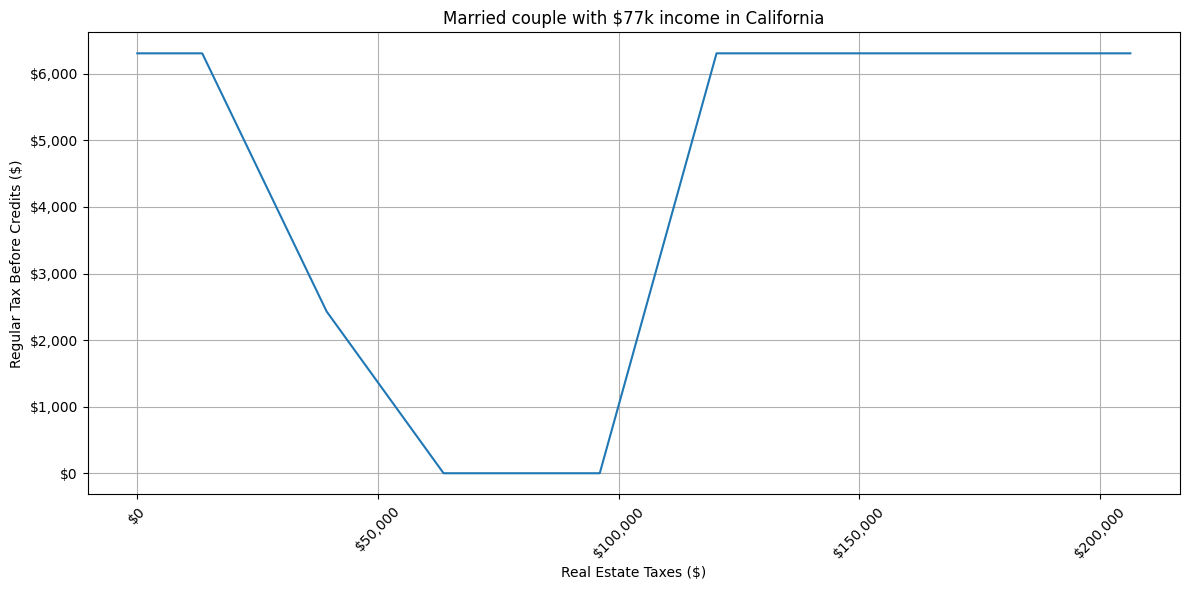

In [15]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(real_estate_taxes, income_tax)
plt.xlabel('Real Estate Taxes ($)')
plt.ylabel('Regular Tax Before Credits ($)')
plt.title('Married couple with $77k income in California')
plt.grid(True)

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

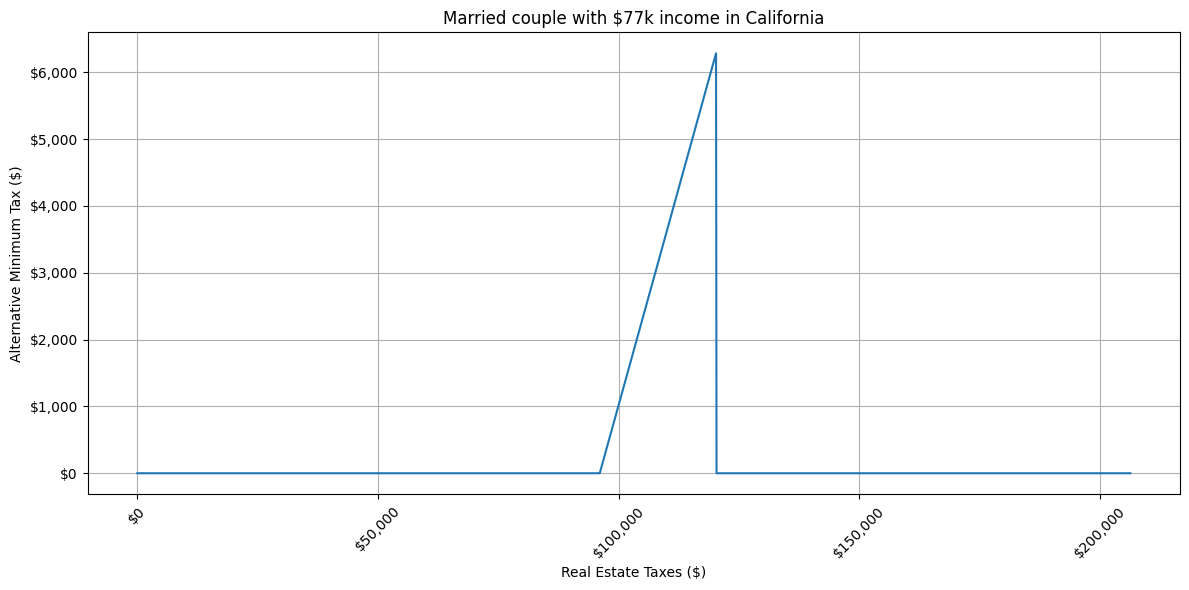

In [17]:
import matplotlib.pyplot as plt

amt = simulation.calculate("amt_base_tax", map_to = "household", period =2026)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(real_estate_taxes, amt)
plt.xlabel('Real Estate Taxes ($)')
plt.ylabel('Alternative Minimum Tax ($)')
plt.title('Married couple with $77k income in California')
plt.grid(True)

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
from policyengine_us import Simulation


situation = {
  "people": {
    "you": {
      "age": {
        "2026": 40
      }
    },
    "your partner": {
      "age": {
        "2026": 40
      },
      "employment_income":{
          "2026": 250000
      }
    }
  },
  "families": {
    "your family": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "marital_units": {
    "your marital unit": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "tax_units": {
    "your tax unit": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "spm_units": {
    "your household": {
      "members": [
        "you",
        "your partner"
      ]
    }
  },
  "households": {
    "your household": {
      "members": [
        "you",
        "your partner"
      ],
      "state_name": {
        "2026": "NJ"
      }
    }
  },
  "axes": [
    [
      {
        "name": "real_estate_taxes",
        "count": 3000,
        "min": 0,
        "max": 300000
      }
    ]
  ]
}

simulation = Simulation(
    reform =baseline_brachning_reform,
    situation=situation,
)


In [6]:
regular_tax = simulation.calculate("regular_tax_before_credits", map_to = "household", period = 2026)
amt = simulation.calculate("amt_base_tax", map_to = "household", period = 2026)
amt_income = simulation.calculate("amt_income", map_to = "household", period = 2026)
taxable_income = simulation.calculate("taxable_income", map_to = "household", period = 2026)
income_tax = simulation.calculate("income_tax", map_to = "household", period = 2026)

In [7]:
import pandas as pd
import numpy as np

# Create x-axis values (real estate taxes)
real_estate_taxes = simulation.calculate("real_estate_taxes", map_to = "household", period =2026)

state_and_local_taxes = simulation.calculate("state_and_local_sales_or_income_tax", map_to = "household", period =2026)

salt = real_estate_taxes + state_and_local_taxes

# Create DataFrame
df = pd.DataFrame({
    'salt': salt,
    'real_estate_taxes': real_estate_taxes,
    'amt': amt,
    'state_and_local_taxes': state_and_local_taxes,
    'regular_tax': regular_tax,
    'amt_income': amt_income,
    'taxable_income': taxable_income,
    'income_tax': income_tax
})

# Display the first few rows
print(df.head())


           salt  real_estate_taxes      amt  state_and_local_taxes  \
0  13735.049805           0.000000  39104.0           13735.049805   
1  13838.256218         103.206413  39104.0           13735.049805   
2  13941.462631         206.412827  39104.0           13735.049805   
3  14044.669037         309.619232  39104.0           13735.049805   
4  14147.875458         412.825653  39104.0           13735.049805   

   regular_tax  amt_income  taxable_income  income_tax  
0      45339.0    250000.0        222800.0     45339.0  
1      45339.0    250000.0        222800.0     45339.0  
2      45339.0    250000.0        222800.0     45339.0  
3      45339.0    250000.0        222800.0     45339.0  
4      45339.0    250000.0        222800.0     45339.0  


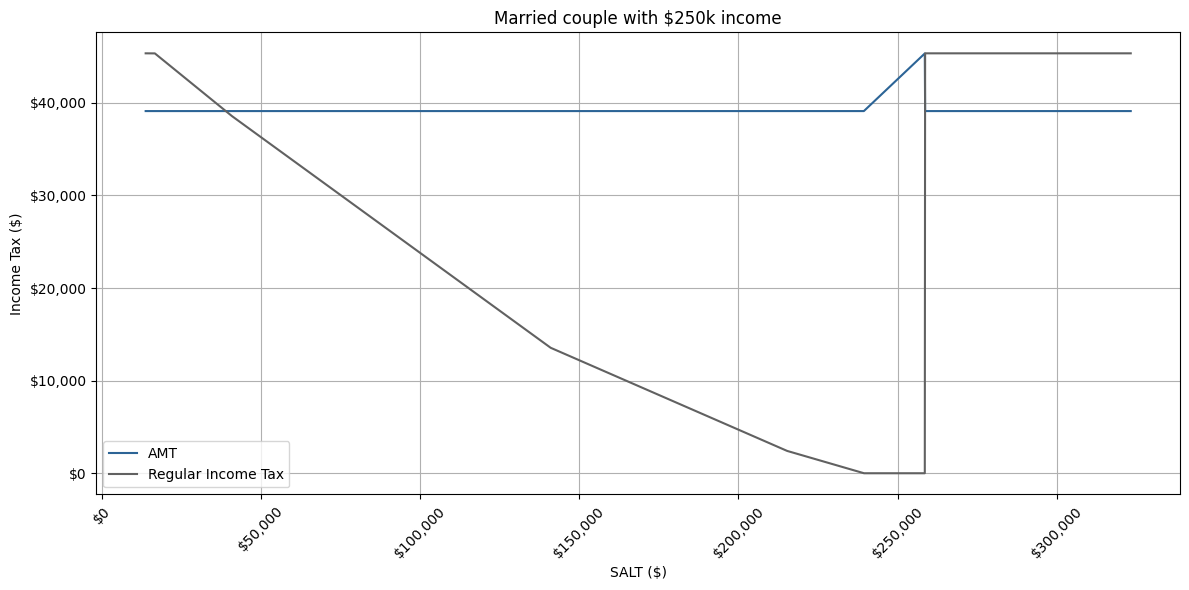

In [8]:
import matplotlib.pyplot as plt

# Define colors
BLUE_PRIMARY = "#2C6496"
DARK_GRAY = "#616161"

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(salt, amt, label='AMT', color=BLUE_PRIMARY)
plt.plot(salt, regular_tax, label='Regular Income Tax', color=DARK_GRAY)
plt.xlabel('SALT ($)')
plt.ylabel('Income Tax ($)')
plt.title('Married couple with $250k income')
plt.grid(True)
plt.legend()  # Add this line to show the legend

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

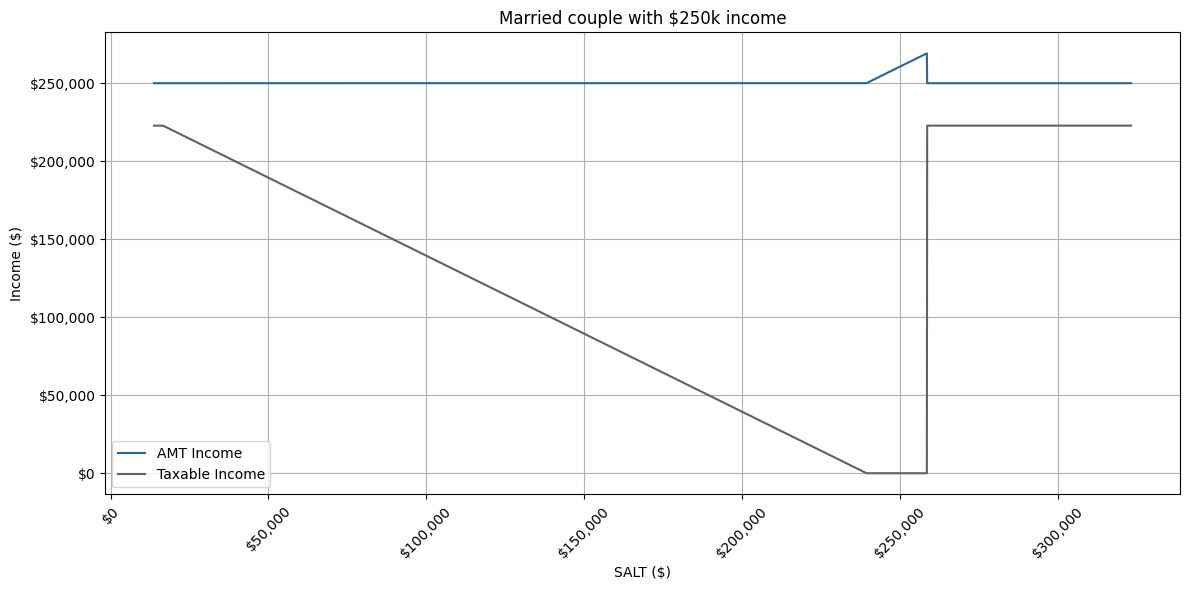

In [9]:
import matplotlib.pyplot as plt

# Define colors
BLUE_PRIMARY = "#2C6496"
DARK_GRAY = "#616161"

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(salt, amt_income, label='AMT Income', color=BLUE_PRIMARY)
plt.plot(salt, taxable_income, label='Taxable Income', color=DARK_GRAY)
plt.xlabel('SALT ($)')
plt.ylabel('Income ($)')
plt.title('Married couple with $250k income')
plt.grid(True)
plt.legend()  # Add this line to show the legend

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

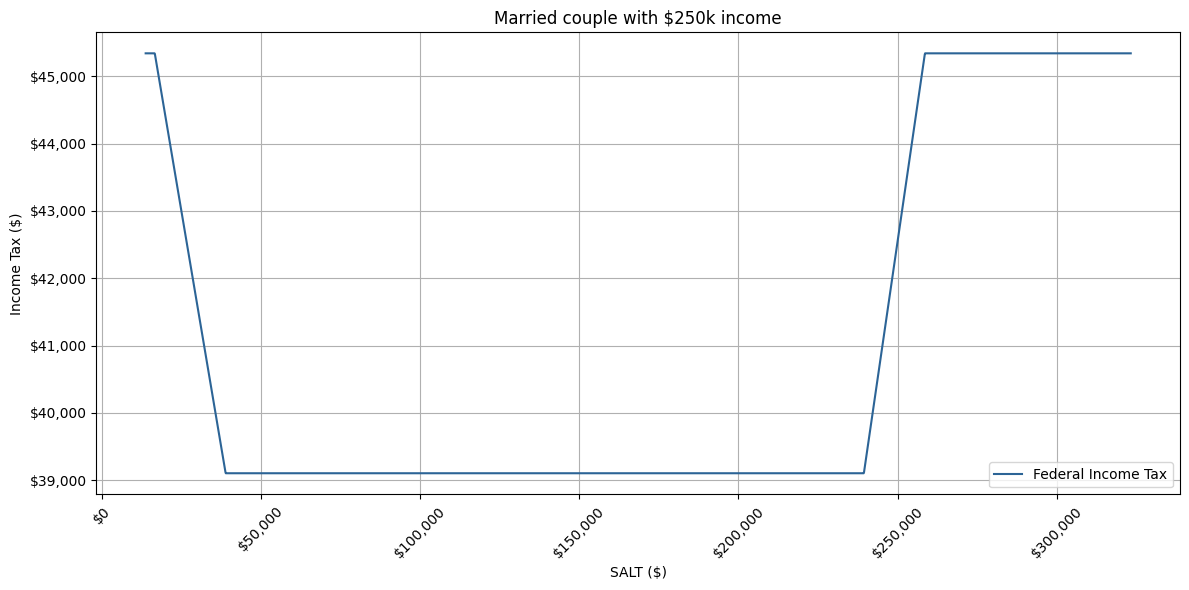

In [10]:
import matplotlib.pyplot as plt

# Define colors
BLUE_PRIMARY = "#2C6496"
DARK_GRAY = "#616161"

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(salt, income_tax, label='Federal Income Tax', color=BLUE_PRIMARY)
plt.xlabel('SALT ($)')
plt.ylabel('Income Tax ($)')
plt.title('Married couple with $250k income')
plt.grid(True)
plt.legend()  # Add this line to show the legend

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,salt,real_estate_taxes,amt,state_and_local_taxes,regular_tax,amt_income,taxable_income,income_tax
0,13735.049805,0.000000,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
1,13838.256218,103.206413,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
2,13941.462631,206.412827,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
3,14044.669037,309.619232,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
4,14147.875458,412.825653,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
5,14251.081848,516.032043,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
6,14354.288269,619.238464,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
7,14457.494629,722.444824,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
8,14560.701111,825.651306,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
9,14663.907471,928.857666,39104.000000,13735.049805,45339.000000,250000.000000,222800.000000,45339.000000
